In [1]:
%matplotlib inline

import io
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib
import matplotlib.pyplot as plt

matplotlib.rcParams['figure.figsize'] = (16.0, 14.0)
matplotlib.style.use('ggplot')

In [2]:
from ipywidgets import *
from IPython.display import display
from IPython.html import widgets

/Users/lr/anaconda2/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [3]:
DISTRIBUTIONS = [
    stats.alpha(a=3.57, loc=0.0, scale=1.0), 
    stats.anglit(loc=0.0, scale=1.0), 
    stats.arcsine(loc=0.0, scale=1.0), 
    stats.beta(a=2.31, b=0.627, loc=0.0, scale=1.0), 
    stats.betaprime(a=5, b=6, loc=0.0, scale=1.0), 
    stats.bradford(c=0.299, loc=0.0, scale=1.0), 
    stats.burr(c=10.5, d=4.3, loc=0.0, scale=1.0), 
    stats.cauchy(loc=0.0, scale=1.0), 
    stats.chi(df=78, loc=0.0, scale=1.0), 
    stats.chi2(df=55, loc=0.0, scale=1.0), 
    stats.cosine(loc=0.0, scale=1.0), 
    stats.dgamma(a=1.1, loc=0.0, scale=1.0), 
    stats.dweibull(c=2.07, loc=0.0, scale=1.0), 
    stats.erlang(a=2, loc=0.0, scale=1.0), 
    stats.expon(loc=0.0, scale=1.0), 
    stats.exponnorm(K=1.5, loc=0.0, scale=1.0), 
    stats.exponweib(a=2.89, c=1.95, loc=0.0, scale=1.0), 
    stats.exponpow(b=2.7, loc=0.0, scale=1.0), 
    stats.f(dfn=29, dfd=18, loc=0.0, scale=1.0), 
    stats.fatiguelife(c=29, loc=0.0, scale=1.0), 
    stats.fisk(c=3.09, loc=0.0, scale=1.0), 
    stats.foldcauchy(c=4.72, loc=0.0, scale=1.0), 
    stats.foldnorm(c=1.95, loc=0.0, scale=1.0), 
    stats.frechet_r(c=1.89, loc=0.0, scale=1.0), 
    stats.frechet_l(c=3.63, loc=0.0, scale=1.0), 
    stats.genlogistic(c=0.412, loc=0.0, scale=1.0), 
    stats.genpareto(c=0.1, loc=0.0, scale=1.0), 
    stats.gennorm(beta=1.3, loc=0.0, scale=1.0), 
    stats.genexpon(a=9.13, b=16.2, c=3.28, loc=0.0, scale=1.0), 
    stats.genextreme(c=-0.1, loc=0.0, scale=1.0),
    stats.gausshyper(a=13.8, b=3.12, c=2.51, z=5.18, loc=0.0, scale=1.0), 
     stats.gamma(a=1.99, loc=0.0, scale=1.0), 
     stats.gengamma(a=4.42, c=-3.12, loc=0.0, scale=1.0), 
     stats.genhalflogistic(c=0.773, loc=0.0, scale=1.0), 
     stats.gilbrat(loc=0.0, scale=1.0), 
     stats.gompertz(c=0.947, loc=0.0, scale=1.0), 
     stats.gumbel_r(loc=0.0, scale=1.0), 
     stats.gumbel_l(loc=0.0, scale=1.0), 
     stats.halfcauchy(loc=0.0, scale=1.0), 
     stats.halflogistic(loc=0.0, scale=1.0), 
     stats.halfnorm(loc=0.0, scale=1.0), 
     stats.halfgennorm(beta=0.675, loc=0.0, scale=1.0), 
     stats.hypsecant(loc=0.0, scale=1.0), 
     stats.invgamma(a=4.07, loc=0.0, scale=1.0), 
     stats.invgauss(mu=0.145, loc=0.0, scale=1.0), 
     stats.invweibull(c=10.6, loc=0.0, scale=1.0), 
     stats.johnsonsb(a=4.32, b=3.18, loc=0.0, scale=1.0), 
     stats.johnsonsu(a=2.55, b=2.25, loc=0.0, scale=1.0), 
     stats.ksone(n=1e+03, loc=0.0, scale=1.0), 
     stats.kstwobign(loc=0.0, scale=1.0), 
     stats.laplace(loc=0.0, scale=1.0), 
     stats.levy(loc=0.0, scale=1.0), 
     stats.levy_l(loc=0.0, scale=1.0), 
     stats.levy_stable(alpha=0.357, beta=-0.675, loc=0.0, scale=1.0), 
     stats.logistic(loc=0.0, scale=1.0), 
     stats.loggamma(c=0.414, loc=0.0, scale=1.0), 
     stats.loglaplace(c=3.25, loc=0.0, scale=1.0), 
     stats.lognorm(s=0.954, loc=0.0, scale=1.0), 
     stats.lomax(c=1.88, loc=0.0, scale=1.0), 
     stats.maxwell(loc=0.0, scale=1.0), 
     stats.mielke(k=10.4, s=3.6, loc=0.0, scale=1.0), 
     stats.nakagami(nu=4.97, loc=0.0, scale=1.0), 
     stats.ncx2(df=21, nc=1.06, loc=0.0, scale=1.0), 
     stats.ncf(dfn=27, dfd=27, nc=0.416, loc=0.0, scale=1.0), 
     stats.nct(df=14, nc=0.24, loc=0.0, scale=1.0), 
     stats.norm(loc=0.0, scale=1.0), 
     stats.pareto(b=2.62, loc=0.0, scale=1.0), 
     stats.pearson3(skew=0.1, loc=0.0, scale=1.0), 
     stats.powerlaw(a=1.66, loc=0.0, scale=1.0), 
     stats.powerlognorm(c=2.14, s=0.446, loc=0.0, scale=1.0), 
     stats.powernorm(c=4.45, loc=0.0, scale=1.0), 
     stats.rdist(c=0.9, loc=0.0, scale=1.0), 
     stats.reciprocal(a=0.00623, b=1.01, loc=0.0, scale=1.0), 
     stats.rayleigh(loc=0.0, scale=1.0), 
     stats.rice(b=0.775, loc=0.0, scale=1.0), 
     stats.recipinvgauss(mu=0.63, loc=0.0, scale=1.0), 
     stats.semicircular(loc=0.0, scale=1.0), 
     stats.t(df=2.74, loc=0.0, scale=1.0), 
     stats.triang(c=0.158, loc=0.0, scale=1.0), 
     stats.truncexpon(b=4.69, loc=0.0, scale=1.0), 
     stats.truncnorm(a=0.1, b=2, loc=0.0, scale=1.0), 
     stats.tukeylambda(lam=3.13, loc=0.0, scale=1.0), 
     stats.uniform(loc=0.0, scale=1.0), 
     stats.vonmises(kappa=3.99, loc=0.0, scale=1.0), 
     stats.vonmises_line(kappa=3.99, loc=0.0, scale=1.0), 
     stats.wald(loc=0.0, scale=1.0), 
     stats.weibull_min(c=1.79, loc=0.0, scale=1.0), 
     stats.weibull_max(c=2.87, loc=0.0, scale=1.0), 
     stats.wrapcauchy(c=0.0311, loc=0.0, scale=1.0)]

In [4]:
bins = 32
size = 16384
plotData = {}

for distribution in DISTRIBUTIONS:
    try:  
        # Create random data
        rv = pd.Series(distribution.rvs(size=size))
        
        # Get sane start and end points of distribution
        start = distribution.ppf(0.01)
        end = distribution.ppf(0.99)

        # Build PDF and turn into pandas Series
        x = np.linspace(start, end, size)
        y = distribution.pdf(x)
        pdf = pd.Series(y, x)

        # Get histogram of random data
        b = np.linspace(start, end, bins+1)
        y, x = np.histogram(rv, bins=b, normed=True)
        x = [(a+x[i+1])/2.0 for i,a in enumerate(x[0:-1])]
        hist = pd.Series(y, x)

        # Create distribution name and parameter string
        title = '{}({})'.format(distribution.dist.name, ', '.join(['{}={:0.2f}'.format(k,v) for k,v in distribution.kwds.items()]))

        # Store data for later
        plotData[distribution.dist.name] = {'pdf': pdf,
                                            'hist': hist,
                                            'title': title}

    except Exception:
        print 'could not create data for', distribution.dist.name

could not create data for levy_stable


In [5]:
def plotHistPDF(x):
    """
    """
    data = plotData.get(x)
    w = abs(abs(data['hist'].index[0]) - abs(data['hist'].index[1]))
    plt.figure(figsize=(10, 6))
    ax = data['pdf'].plot(kind='line', label='Model PDF', legend=True, lw=2)
    ax.bar(data['hist'].index, data['hist'].values, label='Random Sample', width=w, align='center', alpha=0.5)
    ax.set_title(data['title'])

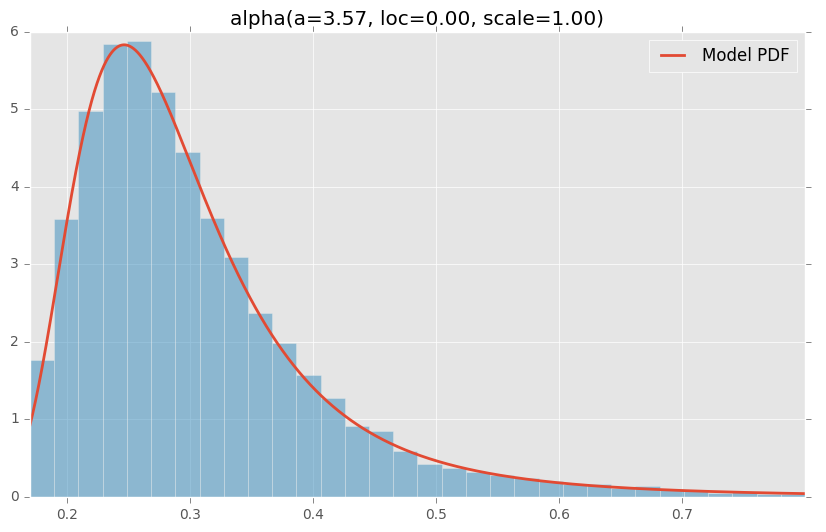

In [6]:
interact(plotHistPDF, 
         x=map(lambda x: x.dist.name, DISTRIBUTIONS));